# 📈 Predicting Supplement Sales Revenue using XGBoost
This notebook demonstrates how to build a regression model to predict supplement sales revenue based on product and marketing data.

## 1. Introduction
We will use XGBoost, a powerful machine learning algorithm, to predict the **Revenue** based on features such as **Units Sold**, **Price**, **Discount**, etc.

## 2. Import Libraries
Let's import the required Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## 3. Load Dataset
Now, let's load the dataset.

In [2]:
df = pd.read_csv('/kaggle/input/supplement-sales-data/Supplement_Sales_Weekly_Expanded.csv')
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


## 4. Exploratory Data Analysis (EDA)
Let's quickly inspect the dataset.

In [3]:
print(df.info())
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB
None
        Units Sold        Price       Revenue     Discount  Units Returned
count  4384.000000  4384.000000   4384.000000  4384.000000     4384.000000
mean    150.200274    34.781229   5226.569446     0.124398        1.531478
std      12.396099    14.198309   2192.491946     0.071792 

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

## 5. Data Preprocessing
We will perform basic preprocessing like encoding categorical features.

In [4]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Category', 'Location', 'Platform'], drop_first=True)

# Define features and target
X = df_encoded.drop(['Revenue', 'Date', 'Product Name'], axis=1)
y = df_encoded['Revenue']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model Training
Let's train an XGBoost Regressor.

In [5]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## 7. Model Evaluation
Now, let's evaluate the model using common regression metrics.

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2 Score (Accuracy for regression): {r2:.2%}")

Mean Absolute Error (MAE): 36.74
Mean Squared Error (MSE): 2800.85
Root Mean Squared Error (RMSE): 52.92
R2 Score (Accuracy for regression): 99.94%


## 8. Feature Importance
Let's visualize which features were most important.

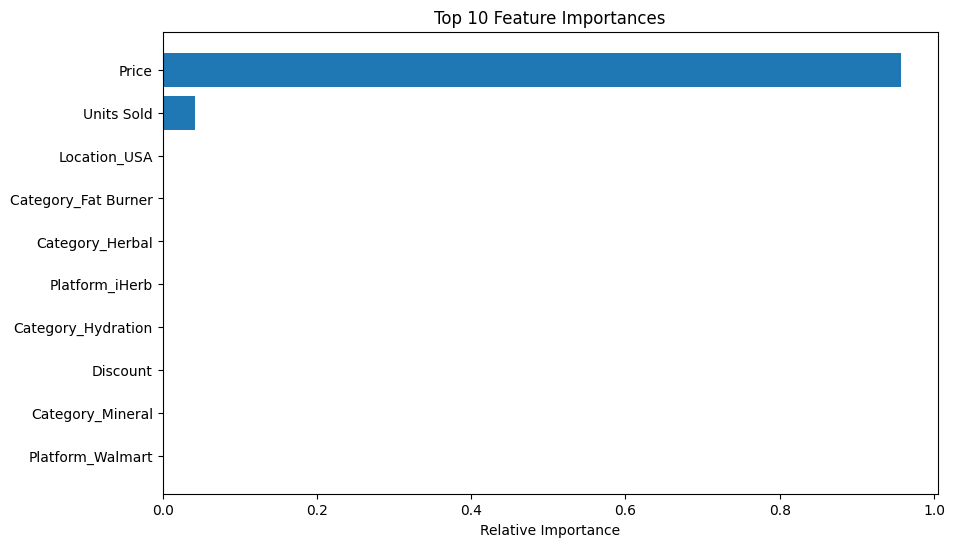

In [7]:
# Plot feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 9. Conclusion
We successfully trained an XGBoost model to predict supplement sales revenue with good accuracy. Further tuning and feature engineering could improve performance even more.